In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [8]:
path = '../../data/2021/05-28-2021.csv'

In [9]:
df = pd.read_csv(path)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3830 non-null   object 
 3   Country_Region       4003 non-null   object 
 4   Last_Update          4003 non-null   object 
 5   Lat                  3914 non-null   float64
 6   Long_                3914 non-null   float64
 7   Confirmed            4003 non-null   int64  
 8   Deaths               4003 non-null   int64  
 9   Recovered            726 non-null    float64
 10  Active               725 non-null    float64
 11  Combined_Key         4003 non-null   object 
 12  Incident_Rate        3915 non-null   float64
 13  Case_Fatality_Ratio  3962 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.0+ KB


In [11]:
df.isnull().sum()

FIPS                    737
Admin2                  732
Province_State          173
Country_Region            0
Last_Update               0
Lat                      89
Long_                    89
Confirmed                 0
Deaths                    0
Recovered              3277
Active                 3278
Combined_Key              0
Incident_Rate            88
Case_Fatality_Ratio      41
dtype: int64

In [12]:
df.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-05-29 04:20:41,33.93911,67.709953,69130,2881,57119.0,9130.0,Afghanistan,177.582703,4.167510
1,NaN,NaN,NaN,Albania,2021-05-29 04:20:41,41.15330,20.168300,132285,2448,129097.0,740.0,Albania,4596.740566,1.850550
2,NaN,NaN,NaN,Algeria,2021-05-29 04:20:41,28.03390,1.659600,128198,3455,89232.0,35511.0,Algeria,292.348805,2.695050
3,NaN,NaN,NaN,Andorra,2021-05-29 04:20:41,42.50630,1.521800,13693,127,13416.0,150.0,Andorra,17722.125154,0.927481
4,NaN,NaN,NaN,Angola,2021-05-29 04:20:41,-11.20270,17.873900,33944,749,27577.0,5618.0,Angola,103.279143,2.206576
5,NaN,NaN,NaN,Antigua and Barbuda,2021-05-29 04:20:41,17.06080,-61.796400,1259,42,1206.0,11.0,Antigua and Barbuda,1285.638428,3.335981
6,NaN,NaN,NaN,Argentina,2021-05-29 04:20:41,-38.41610,-63.616700,3702422,76693,3252843.0,372886.0,Argentina,8191.964484,2.071428
7,NaN,NaN,NaN,Armenia,2021-05-29 04:20:41,40.06910,45.038200,222513,4423,212566.0,5524.0,Armenia,7509.126853,1.987749
8,NaN,NaN,Australian Capital Territory,Australia,2021-05-29 04:20:41,-35.47350,149.012400,124,3,121.0,0.0,"Australian Capital Territory, Australia",28.965195,2.419355
9,NaN,NaN,New South Wales,Australia,2021-05-29 04:20:41,-33.86880,151.209300,5580,54,0.0,5526.0,"New South Wales, Australia",68.736142,0.967742


In [14]:
df[df.Country_Region == 'US'].head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
652,1001.0,Autauga,Alabama,US,2021-05-29 04:20:41,32.539527,-86.644082,7142,110,NaN,NaN,"Autauga, Alabama, US",12783.475630,1.540185
653,1003.0,Baldwin,Alabama,US,2021-05-29 04:20:41,30.727750,-87.722071,21620,311,NaN,NaN,"Baldwin, Alabama, US",9684.904629,1.438483
654,1005.0,Barbour,Alabama,US,2021-05-29 04:20:41,31.868263,-85.387129,2334,59,NaN,NaN,"Barbour, Alabama, US",9454.751681,2.527849
655,1007.0,Bibb,Alabama,US,2021-05-29 04:20:41,32.996421,-87.125115,2664,64,NaN,NaN,"Bibb, Alabama, US",11896.043583,2.402402
656,1009.0,Blount,Alabama,US,2021-05-29 04:20:41,33.982109,-86.567906,6864,139,NaN,NaN,"Blount, Alabama, US",11870.093038,2.025058


<AxesSubplot:>

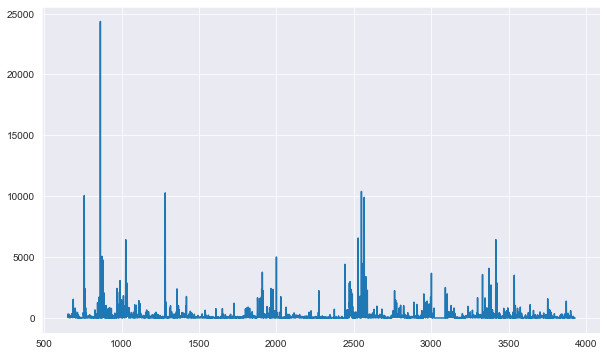

In [15]:
df[df['Country_Region'] == 'US']['Deaths'].plot(kind='line', figsize=(10, 6))

<AxesSubplot:xlabel='Confirmed', ylabel='Deaths'>

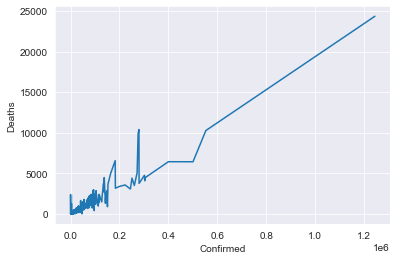

In [18]:
sns.lineplot(x='Confirmed', y='Deaths', data=df[df['Country_Region'] == 'US'])

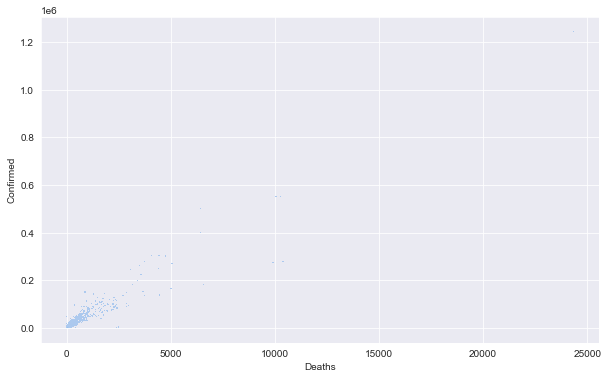

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Deaths', y='Confirmed', data=df[df['Country_Region'] == 'US'])

plt.show()

In [22]:
"""
perform some data cleaning:
- drop the columns that are not needed
- rename columns to more descriptive names
- drop rows with missing values
"""

'\nperform some data cleaning:\n- drop the columns that are not needed\n- rename columns to more descriptive names\n- drop rows with missing values\n'

In [23]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-05-29 04:20:41,33.93911,67.709953,69130,2881,57119.0,9130.0,Afghanistan,177.582703,4.167510
1,NaN,NaN,NaN,Albania,2021-05-29 04:20:41,41.15330,20.168300,132285,2448,129097.0,740.0,Albania,4596.740566,1.850550
2,NaN,NaN,NaN,Algeria,2021-05-29 04:20:41,28.03390,1.659600,128198,3455,89232.0,35511.0,Algeria,292.348805,2.695050
3,NaN,NaN,NaN,Andorra,2021-05-29 04:20:41,42.50630,1.521800,13693,127,13416.0,150.0,Andorra,17722.125154,0.927481
4,NaN,NaN,NaN,Angola,2021-05-29 04:20:41,-11.20270,17.873900,33944,749,27577.0,5618.0,Angola,103.279143,2.206576


In [24]:
df.drop(['FIPS', 'Admin2', 'Province_State', 'Last_Update', 'Lat', 'Long_', 
        'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'], axis=1, inplace=True)

In [25]:
df.head()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,69130,2881,57119.0,9130.0
1,Albania,132285,2448,129097.0,740.0
2,Algeria,128198,3455,89232.0,35511.0
3,Andorra,13693,127,13416.0,150.0
4,Angola,33944,749,27577.0,5618.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Region  4003 non-null   object 
 1   Confirmed       4003 non-null   int64  
 2   Deaths          4003 non-null   int64  
 3   Recovered       726 non-null    float64
 4   Active          725 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 156.5+ KB


In [27]:
df.isnull().sum()

Country_Region       0
Confirmed            0
Deaths               0
Recovered         3277
Active            3278
dtype: int64

In [28]:
# drop all the missing values
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 4002
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Region  725 non-null    object 
 1   Confirmed       725 non-null    int64  
 2   Deaths          725 non-null    int64  
 3   Recovered       725 non-null    float64
 4   Active          725 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.0+ KB


In [30]:
df.isnull().sum()

Country_Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

In [32]:
df.rename(columns={'Country_Region': 'Country', 'Province_State': 'State', 'Confirmed': 'Cases', 'Deaths': 'Deaths'}, inplace=True)

In [33]:
df.head()

,Country,Cases,Deaths,Recovered,Active
0,Afghanistan,69130,2881,57119.0,9130.0
1,Albania,132285,2448,129097.0,740.0
2,Algeria,128198,3455,89232.0,35511.0
3,Andorra,13693,127,13416.0,150.0
4,Angola,33944,749,27577.0,5618.0


<AxesSubplot:>

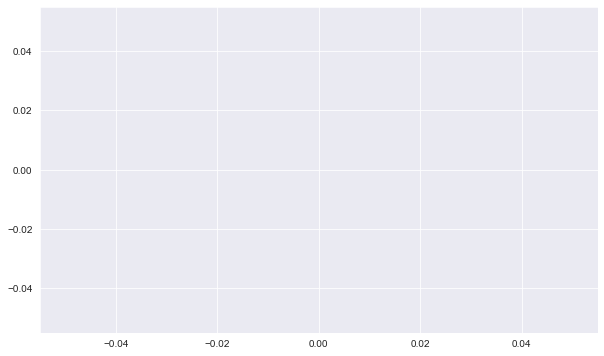

In [38]:
df[df.Country == 'US']['Deaths'].plot(kind='line', figsize=(10, 6))

In [40]:
columns = ['Cases', 'Active', 'Recovered', 'Deaths']
world = df.groupby('Country')[columns].sum().reset_index()

In [42]:
world.head(20)

,Country,Cases,Active,Recovered,Deaths
0,Afghanistan,69130,9130.0,57119.0,2881
1,Albania,132285,740.0,129097.0,2448
2,Algeria,128198,35511.0,89232.0,3455
3,Andorra,13693,150.0,13416.0,127
4,Angola,33944,5618.0,27577.0,749
5,Antigua and Barbuda,1259,11.0,1206.0,42
6,Argentina,3702422,372886.0,3252843.0,76693
7,Armenia,222513,5524.0,212566.0,4423
8,Australia,30083,5598.0,23575.0,910
9,Austria,643709,6306.0,626815.0,10588


In [44]:
# sort out by country with the most cases
world.sort_values(by='Cases', ascending=False)

,Country,Cases,Active,Recovered,Deaths
79,India,27729247,2228724.0,25178011.0,322512
23,Brazil,16391930,1440184.0,14492701.0,459045
62,France,5708350,5208702.0,390196.0,109455
180,Turkey,5228322,98089.0,5083099.0,47134
144,Russia,4986458,260796.0,4607276.0,118386
...,...,...,...,...,...
149,Samoa,3,0.0,3.0,0
91,Kiribati,2,2.0,0.0,0
116,Micronesia,1,0.0,1.0,0
134,Palau,0,0.0,0.0,0


In [46]:
# show countries with the most deaths
world.sort_values(by='Deaths', ascending=False).head(5)

,Country,Cases,Active,Recovered,Deaths
23,Brazil,16391930,1440184.0,14492701.0,459045
79,India,27729247,2228724.0,25178011.0,322512
115,Mexico,2408778,261962.0,1923744.0,223072
138,Peru,1942054,-19556.0,1892794.0,182556
184,United Kingdom,4493582,4350072.0,15480.0,128030


<AxesSubplot:title={'center':'Countries with the most deaths'}>

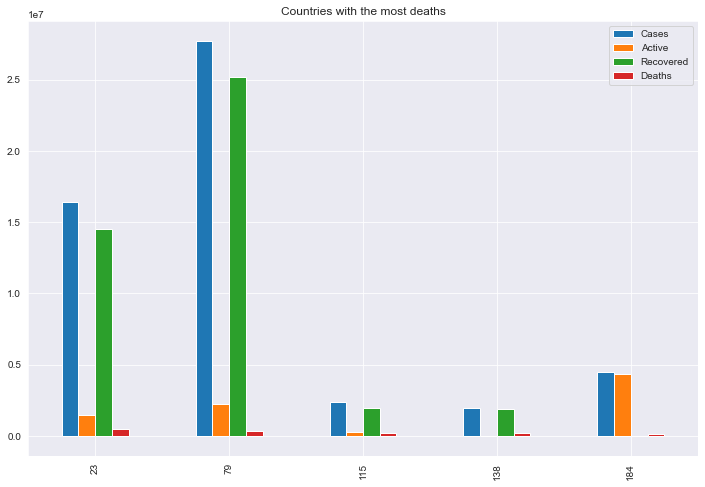

In [48]:
# plot countries with the most deaths
world.sort_values(by='Deaths', ascending=False).head(5).plot(kind='bar', 
                                                            figsize=(12, 8),
                                                            title='Countries with the most deaths',
                                                            )

<AxesSubplot:title={'center':'COVID-19 in Canada on May-28-2021'}>

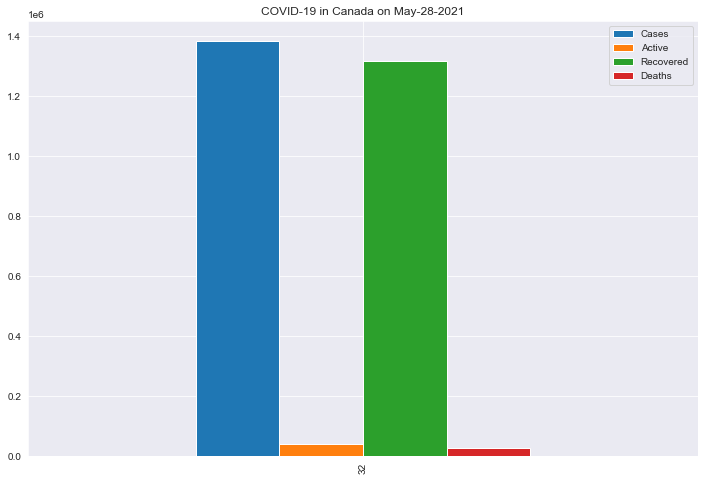

In [52]:
world[world['Country'] == 'Canada'].sort_values(by='Deaths', ascending=False).head(5).plot(kind='bar',
                                                                                            figsize=(12, 8),
                                                                                            title='COVID-19 in Canada on May-28-2021')

In [53]:
import plotly.express as px

In [55]:
#  check the data for the entire planet
fig = px.scatter_geo(world,
                        locations='Country',
                        locationmode='country names',
                        color='Deaths',
                        hover_name='Country',
                        hover_data=['Cases', 'Active', 'Recovered', 'Deaths'],
                        size='Deaths',
                        size_max=50,
                        range_color=(0, 1000),  # set the range of the color scale
                        projection='natural earth')

fig.show()


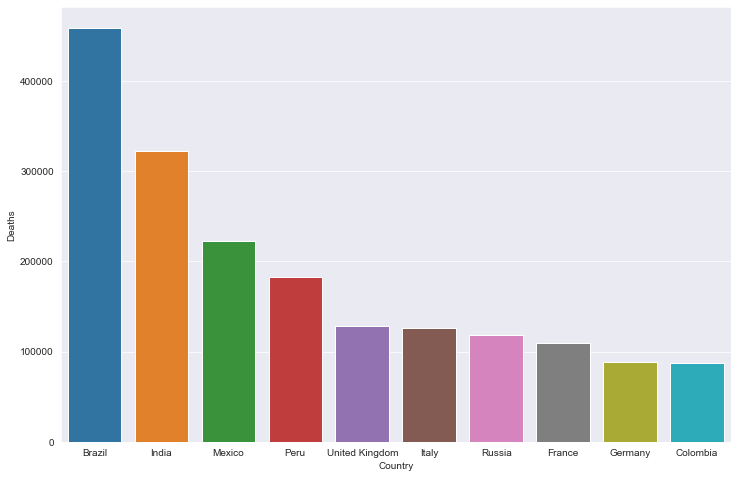

In [56]:
# make a barplot of the top 10 countries with the most deaths
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Deaths', data=world.sort_values(by='Deaths', ascending=False).head(10))
plt.show()

In [57]:
top_ten = world.sort_values(by='Deaths', ascending=False).head(10)

In [58]:
top_ten

,Country,Cases,Active,Recovered,Deaths
23,Brazil,16391930,1440184.0,14492701.0,459045
79,India,27729247,2228724.0,25178011.0,322512
115,Mexico,2408778,261962.0,1923744.0,223072
138,Peru,1942054,-19556.0,1892794.0,182556
184,United Kingdom,4493582,4350072.0,15480.0,128030
85,Italy,4209707,246270.0,3837518.0,125919
144,Russia,4986458,260796.0,4607276.0,118386
62,France,5708350,5208702.0,390196.0,109455
66,Germany,3680159,119149.0,3472650.0,88360
37,Colombia,3342567,133472.0,3121888.0,87207


<AxesSubplot:title={'center':'Top 10 Countries with the most deaths'}>

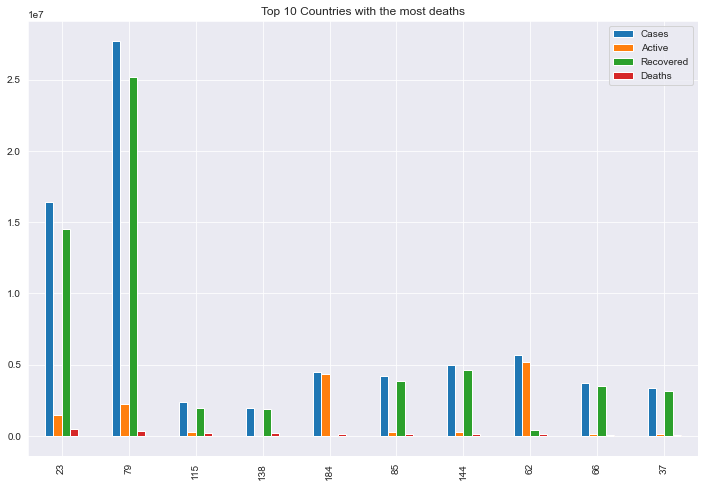

In [59]:
top_ten.plot(kind='bar', figsize=(12, 8), title='Top 10 Countries with the most deaths')

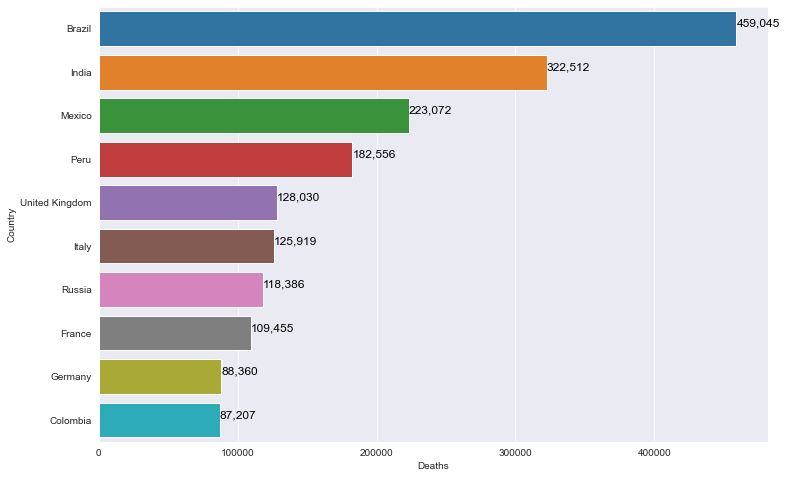

In [60]:
plt.figure(figsize=(12, 8))
plot = sns.barplot(x='Deaths', y='Country', data=top_ten)
for i, (value, name) in enumerate(zip(top_ten['Deaths'], top_ten['Country'])):
    plot.text(value, i-0.05, f"{value:,.0f}", size=12, color='black')

plt.show()

In [61]:
top_five = world.sort_values(by='Deaths', ascending=False).head(5)

In [62]:
top_five

,Country,Cases,Active,Recovered,Deaths
23,Brazil,16391930,1440184.0,14492701.0,459045
79,India,27729247,2228724.0,25178011.0,322512
115,Mexico,2408778,261962.0,1923744.0,223072
138,Peru,1942054,-19556.0,1892794.0,182556
184,United Kingdom,4493582,4350072.0,15480.0,128030


No handles with labels found to put in legend.


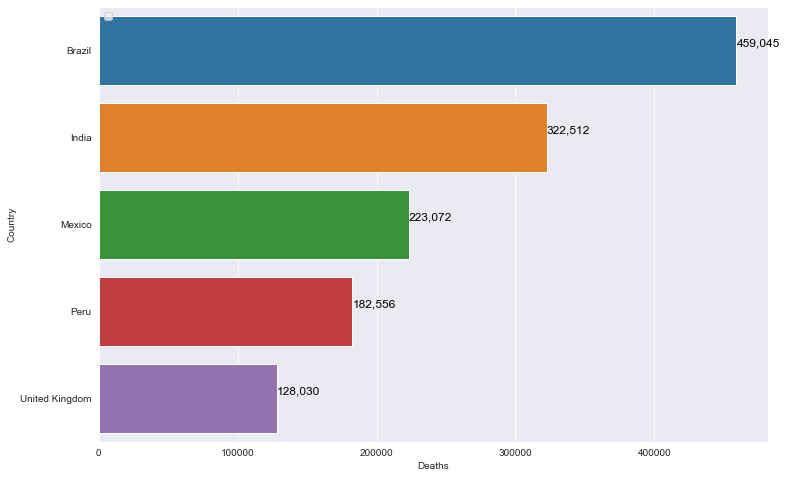

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Deaths', y='Country', data=top_five)
for i, (value, name) in enumerate(zip(top_five['Deaths'], top_five['Country'])):
    plt.text(value, i-0.05, f"{value:,.0f}", size=12, color='black')

plt.legend(loc='upper left')
plt.show()

In [67]:
# plotting a choropleth map on a world map
fig = px.choropleth(world, locations='Country', 
                    locationmode='country names',
                    color='Cases',
                    hover_name='Country',
                    color_continuous_scale='viridis',
                    range_color=(0, 1000),  # set the range of the color scale
                    title='COVID-19 Confirmed Cases in the World')

fig.show()